In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
COIN_BLOCK_INFO_PATH = "coin_block_info"

coin = "EXVO"
coin_per_block = 3.8
our_nethash = 1600000000

# coin = "RVN"
# coin = "PGN"
# coin = "LUX"
# coin = "PROTON"
# coin = "RDEN"

fname = os.path.join(COIN_BLOCK_INFO_PATH, coin+"_block_info.csv")

In [3]:
df = pd.read_csv(fname)

In [4]:
df['date'] = pd.to_datetime(df['time'],unit='s')

In [5]:
print("Number of Blocks: {}".format(df.count()[0]))

Number of Blocks: 2000


In [6]:
print("Latest Block: {}".format(int(df["height"][0])))

Latest Block: 46867


In [7]:
df.head(5)

,difficulty,height,nonce,time,date
0,330.860828,46867.0,3.647012e+09,1.525605e+09,2018-05-06 11:07:09
1,323.348945,46866.0,3.159328e+09,1.525605e+09,2018-05-06 11:04:51
2,204.402641,46865.0,1.549582e+09,1.525605e+09,2018-05-06 11:04:29
3,199.701940,46864.0,1.605962e+09,1.525605e+09,2018-05-06 11:03:54
4,180.934386,46863.0,3.462917e+09,1.525605e+09,2018-05-06 11:03:15


In [8]:
df_block_rate = df[['height','time']]
df_block_rate.head(3)

,height,time
0,46867.0,1.525605e+09
1,46866.0,1.525605e+09
2,46865.0,1.525605e+09


In [9]:
MA_window = min(400, int((df_block_rate.count()[0]-1)*0.5))
print("MA Windows = {}".format(MA_window))

MA Windows = 400


In [10]:
df_block_rate.count()

height    2000
time      2000
dtype: int64

In [11]:
df_block_rate = df_block_rate.diff(-MA_window)
df_block_rate.head(5)

,height,time
0,400.0,27284.0
1,400.0,27161.0
2,400.0,27157.0
3,400.0,27133.0
4,400.0,27105.0


In [12]:
df_block_rate['block_per_day']=df_block_rate['height']/df_block_rate['time']*3600*24

In [13]:
df_block_rate.head(5)

,height,time,block_per_day
0,400.0,27284.0,1266.676440
1,400.0,27161.0,1272.412650
2,400.0,27157.0,1272.600066
3,400.0,27133.0,1273.725721
4,400.0,27105.0,1275.041505


In [14]:
df_block_rate_count = df_block_rate.count()[0]
print(df_block_rate_count)

1600


In [15]:
df_block_rate_full = pd.concat([df["height"].head(df_block_rate_count), df_block_rate['block_per_day']],axis=1)

In [16]:
df_block_rate_full.head(3)

,height,block_per_day
0,46867.0,1266.676440
1,46866.0,1272.412650
2,46865.0,1272.600066


In [18]:
block_speed_latest = int(df_block_rate['block_per_day'][0])

In [19]:
print("Coin [{}] Block Speed is {} Blocks/Day".format(coin, block_speed_latest))

Coin [EXVO] Block Speed is 1266 Blocks/Day


In [20]:
COIN_NETHASH_INFO_PATH = "coin_nethash_info"
fname = os.path.join(COIN_NETHASH_INFO_PATH, coin+"_nethash_info.csv")

In [21]:
df_nethash = pd.read_csv(fname)

In [22]:
print("Number of Nethash Sample: {}".format(df_nethash.count()[0]))

Number of Nethash Sample: 566


In [23]:
print("Latest Block: {}".format(int(df_nethash["height"][0])))

Latest Block: 46868


In [24]:
df_nethash.head(5)

,height,nethash
0,46868,20515458081
1,46867,20763713787
2,46866,20884557046
3,46864,20636246844
4,46863,20737345128


In [25]:
df_nethash_block = pd.merge(df_block_rate_full, df_nethash, how='inner', on='height')

In [26]:
df_nethash_block.head(3)

,height,block_per_day,nethash
0,46867,1266.676440,20763713787
1,46866,1272.412650,20884557046
2,46864,1273.725721,20636246844


In [27]:
df_nethash_block["profit"]=df_nethash_block["block_per_day"]*our_nethash/df_nethash_block["nethash"]*coin_per_block
df_nethash_block_profit = df_nethash_block

In [28]:
df_nethash_block_profit.head(5)

,height,block_per_day,nethash,profit
0,46867,1266.676440,20763713787,370.906324
1,46866,1272.412650,20884557046,370.430117
2,46864,1273.725721,20636246844,375.274266
3,46863,1275.041505,20737345128,373.830512
4,46862,1274.054413,20331730869,380.993182


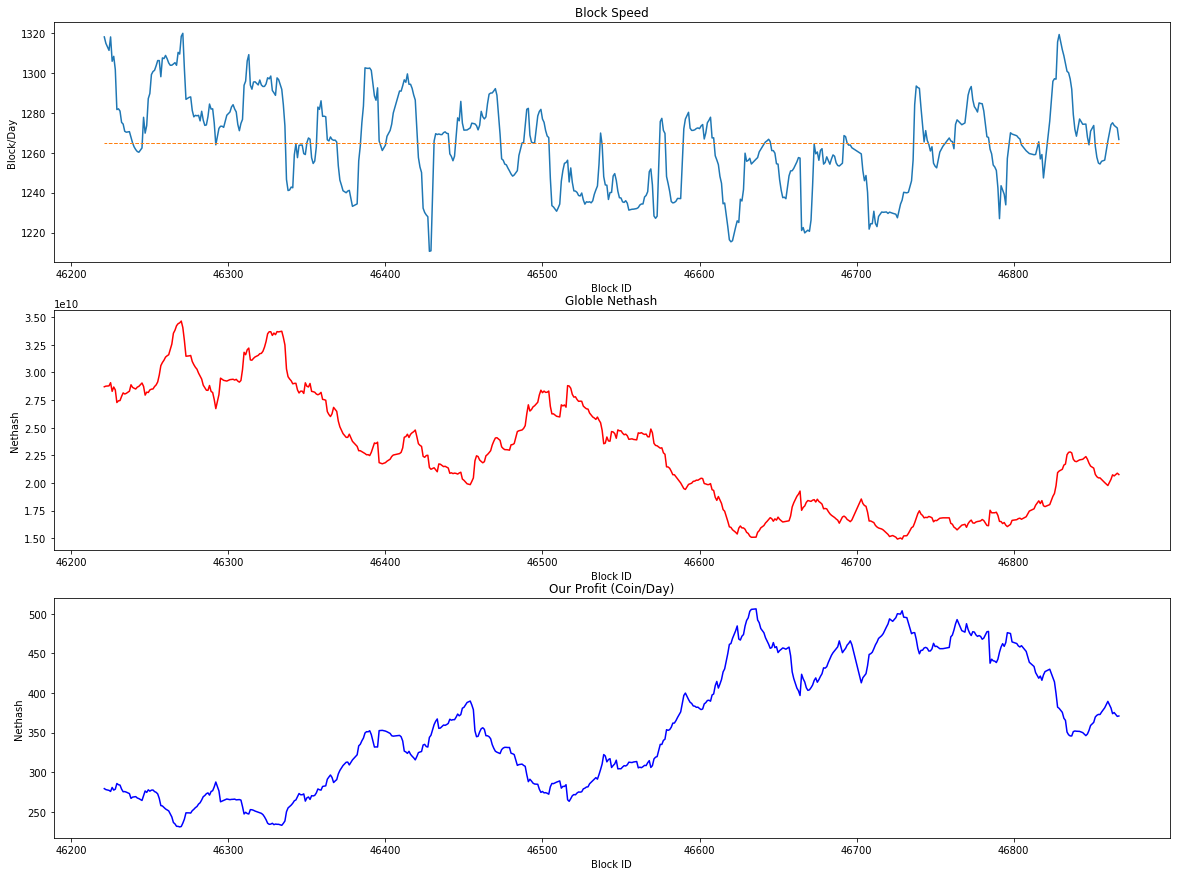

In [30]:
#df_block_rate_count
fig = plt.figure(figsize=(20,15))
plt.subplot(3, 1, 1)
plt.plot(df_nethash_block_profit['height'], df_nethash_block_profit['block_per_day'])
plt.plot(df_nethash_block_profit['height'], 
         [np.mean(df_nethash_block_profit['block_per_day'])]*df_nethash_block_profit['height'].count(), 
         linestyle = '--', linewidth = 1)

plt.title('Block Speed')
plt.xlabel('Block ID')
plt.ylabel('Block/Day')

plt.subplot(3, 1, 2)
plt.plot(df_nethash_block_profit['height'], df_nethash_block_profit['nethash'], color='red')
plt.title('Globle Nethash')
plt.xlabel('Block ID')
plt.ylabel('Nethash')

plt.subplot(3, 1, 3)
plt.plot(df_nethash_block_profit['height'], df_nethash_block_profit['profit'], color='blue')
plt.title('Our Profit (Coin/Day)')
plt.xlabel('Block ID')
plt.ylabel('Nethash')

plt.show()
